# **Yefer Villate Cortes**
## Grupo 202016908_34
### Tarea 4 Algoritmos de Aprendizaje no supervisado
## **El lenguaje a utilizar es Python, el cual se trabajará mediante Jupyter notebooks, utilizando Anaconda.**
### https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
### Dataset k-means e hierarchical clustering - Mall Customer Segmentation Data:
###   **Este dataset contiene información de clientes de un mall. Las variables incluyen género, ingreso, puntaje de gasto, etc.**
### Con el dataset anterior diseñar los modelos de Clustering (agrupación): K-means e hierarchical clustering. 

## **Para cada algoritmo realizar los siguientes pasos:**
### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
### 4. Entrenar el modelo configurando los diferentes hiperparámetros.
### 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.
### 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo
### 7. Interpretar, analizar y documentar los resultados obtenidos.

## **2. Clustering Jerárquico (Hierarchical Clustering)**
### **1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

In [4]:
# Cargamos el dataset
df = pd.read_csv('C:/Users/AD2025/Mall_Customers.csv')

In [5]:
# Realizamos el Análisis exploratorio
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: >

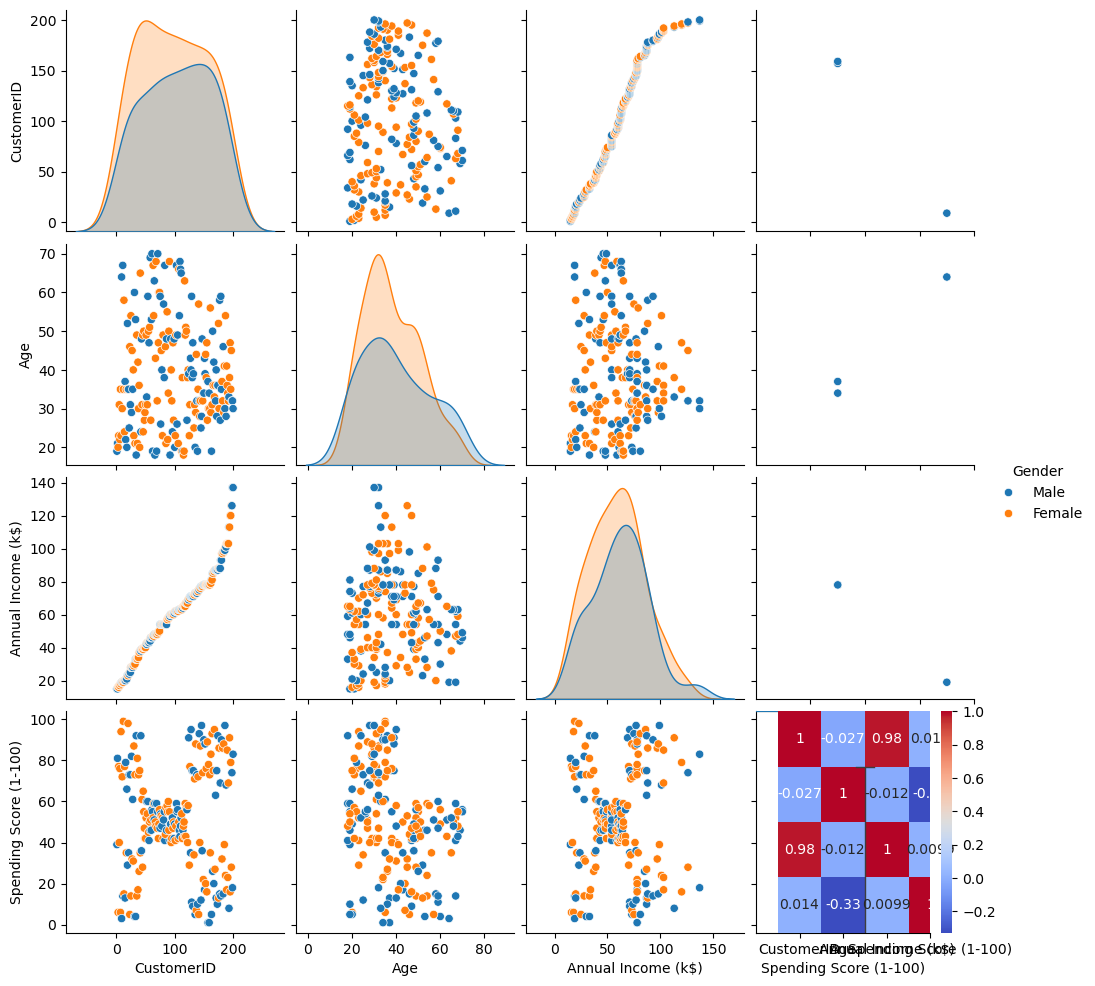

In [6]:
# Visualizaciones
sns.pairplot(df, hue='Gender')
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
sns.boxplot(data=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

### **2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.**

In [8]:
# Codificación de variable categórica
df_encoded = df.copy()
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 0, 'Female': 1})

# Selección de columnas relevantes
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df_encoded[features]

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.**

In [10]:
# En este caso, ya seleccionamos manualmente las más relevantes para clustering: Edad, Ingreso anual y Puntaje de gasto. 
# Podemos aplicar PCA para visualizar mejor:


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

### **4. Entrenar el modelo de clustering jerárquico.**

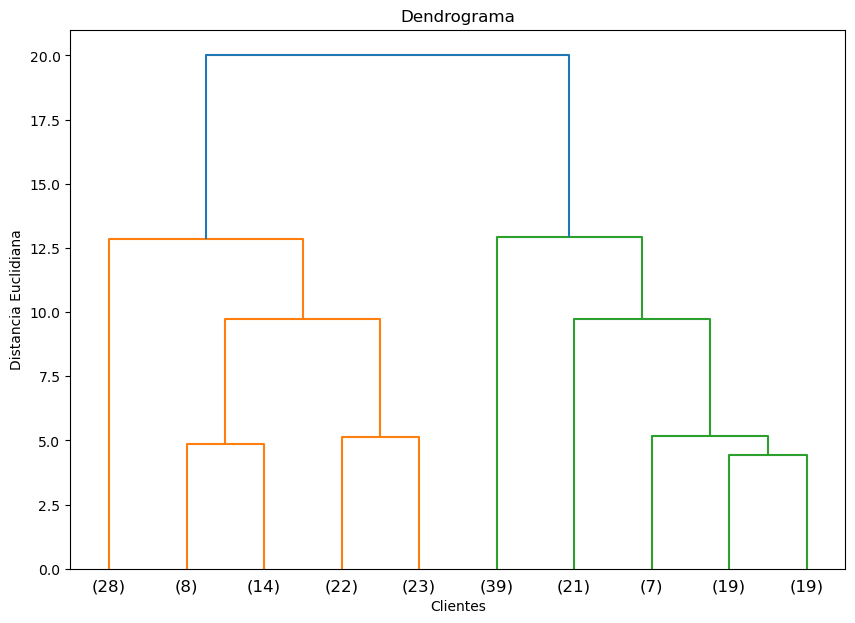

In [12]:
# Crear el linkage
linked = linkage(X_scaled, method='ward')

# Visualizar dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=10)
plt.title("Dendrograma")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclidiana")
plt.show()

In [13]:
# Elegimos un número de clusters a partir del dendrograma:

# Cortar el dendrograma en k clusters
n_clusters = 5
clusters = fcluster(linked, n_clusters, criterion='maxclust')
df_encoded['Cluster'] = clusters

### **5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.**

In [15]:
silhouette_avg = silhouette_score(X_scaled, clusters)
calinski_harabasz = calinski_harabasz_score(X_scaled, clusters)

print(f"Coeficiente de Silhouette: {silhouette_avg:.3f}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz:.3f}")

Coeficiente de Silhouette: 0.390
Índice de Calinski-Harabasz: 107.827


### **6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.**

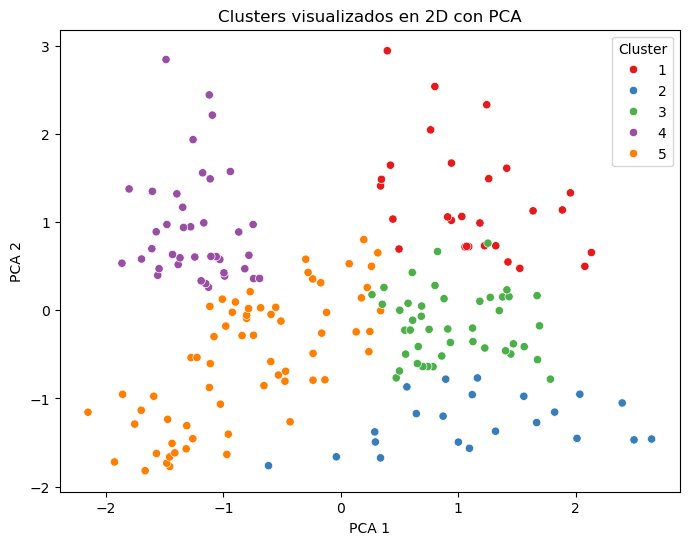

In [17]:
# Visualización 2D usando PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set1')
plt.title('Clusters visualizados en 2D con PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

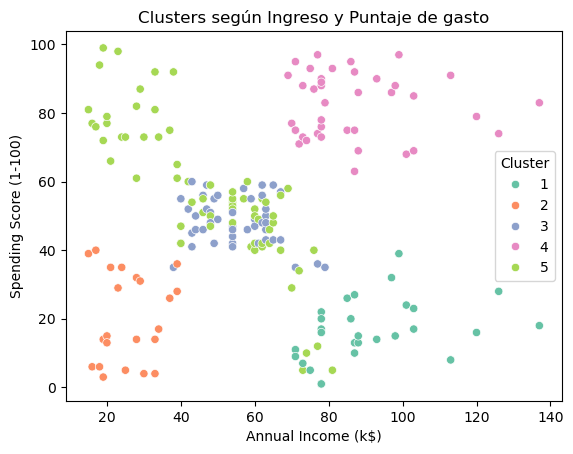

In [21]:
# Directamente en base a dos variables relevantes

sns.scatterplot(data=df_encoded, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
plt.title('Clusters según Ingreso y Puntaje de gasto')
plt.show()

### **7. Interpretar, analizar y documentar los resultados obtenidos.**

In [24]:
# Revisamos estadísticas por grupo:

df_encoded.groupby('Cluster')[features].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
1,43.892857,91.285714,16.678571
2,44.318182,25.772727,20.272727
3,56.400000,55.288889,48.355556
4,32.692308,86.538462,82.128205
5,26.560606,47.363636,56.787879


| Edad | (avg) | Ingreso (k$ avg) |	Score de Gasto (avg) | Interpretación|
|:---: |:---:  |:---:             |:---:                 |---            |
|1     | 43.9  | 91.3 | 16.7 |Clientes mayores con alto ingreso, pero gastan poco. Posiblemente clientes conservadores o poco interesados en consumir.|
|2	   | 44.3  | 25.8 | 20.3  |Clientes mayores con bajo ingreso y bajo gasto. Poco atractivos comercialmente.|
|3     | 56.4  | 55.3 | 48.4  |Clientes muy mayores con ingreso medio y gasto medio. Segmento más neutral.|
|4     | 32.7  | 86.5 | 82.1  |Clientes jóvenes-adultos con alto ingreso y alto gasto. Perfil ideal para estrategias de marketing.|
|5     | 26.6  | 47.4 | 56.8   |Clientes jóvenes con ingreso medio y gasto medio-alto. Buen potencial de fidelización a largo plazo.|